In [ ]:
"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [4]:
# code here
import pandas as pd
import numpy as np
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

birds = pd.DataFrame(data,index = labels)
print(birds.describe())
print(birds[::2])

            age     visits
count  9.000000  11.000000
mean   4.333333   2.818182
std    1.903943   0.873863
min    1.500000   2.000000
25%    3.500000   2.000000
50%    4.000000   3.000000
75%    5.500000   3.500000
max    8.000000   4.000000
        birds  age  visits priority
a      Cranes  3.5       2      yes
c     plovers  1.5       3       no
e  spoonbills  6.0       3       no
g     plovers  5.5       2       no
i  spoonbills  8.0       3       no
k      Cranes  3.5       2      yes


###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [13]:
# code here
print(birds.iloc[[1,3,7]][['birds','age']])

print(birds[birds['visits'] < 4])

        birds  age
b      Cranes  4.0
d  spoonbills  NaN
h      Cranes  NaN
        birds  age  visits priority
a      Cranes  3.5       2      yes
c     plovers  1.5       3       no
e  spoonbills  6.0       3       no
g     plovers  5.5       2       no
h      Cranes  NaN       2      yes
i  spoonbills  8.0       3       no
j  spoonbills  4.0       2       no
k      Cranes  3.5       2      yes


###Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [44]:
# code here
birds[birds.isnull()['age']]['age'].fillna(birds['age'].mean())

d    4.333333
h    4.333333
Name: age, dtype: float64

###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [58]:
# code here
birds[birds['birds'] == 'Cranes']['visits'].sum()
birds['birds'].unique()
birds.duplicated().sum()
birds.drop_duplicates(inplace = True)
birds

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [67]:
# code here
df = pd.read_csv('ipl-matches.csv')
changed_name = {'Delhi Capitals' : 'Delhi Daredevils',
               'Punjab Kings':'Kings XI Punjab',
               'Rising Pune Supergiant':'Rising Pune Supergiants'
              }
df.replace(changed_name.keys(),changed_name.values(),inplace = True)
df.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


<Axes: >

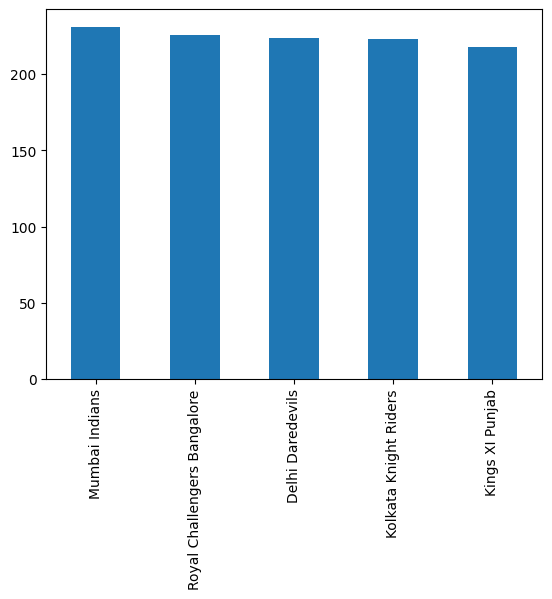

In [72]:
# code here
(df['Team1'].value_counts() + df['Team2'].value_counts()).sort_values(ascending=  False).head().plot(kind = 'bar')

###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [96]:
# code here
df.head(1)
#df[((df['Team1'] != 'Mumbai Indians') & (df['Team2'] == 'Mumbai Indians')) | (df['Team1'] == 'Mumbai Indians') & (df['Team2'] != 'Mumbai Indians')]['Player_of_Match'].value_counts()
#df[df['WinningTeam'] != "Mumbai Indians"][['Player_of_Match']].sort_values(by = 'Player_of_Match',ascending = False).head()

filter_1 = (df['Team1'] == 'Mumbai Indians') | (df['Team2'] == 'Mumbai Indians')
filter_2 = (df['WinningTeam'] != 'Mumbai Indians')
df[filter_1&filter_2].Player_of_Match.value_counts().head(1)

Player_of_Match
SPD Smith    4
Name: count, dtype: int64

###Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [110]:
# code here
df.head()
def team1_vs_team2(t1,t2):
    filter_1 = (df['Team1'] == t1) | (df['Team2'] == t1)
    filter_2 = (df['Team1'] == t2) | (df['Team2'] == t2)
    new_df = df[filter_1 & filter_2]
    print(new_df.WinningTeam.value_counts())
    print(new_df.Player_of_Match.value_counts().head(1))
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

WinningTeam
Chennai Super Kings      17
Kolkata Knight Riders     9
Name: count, dtype: int64
Player_of_Match
RA Jadeja    3
Name: count, dtype: int64


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<Axes: xlabel='City'>

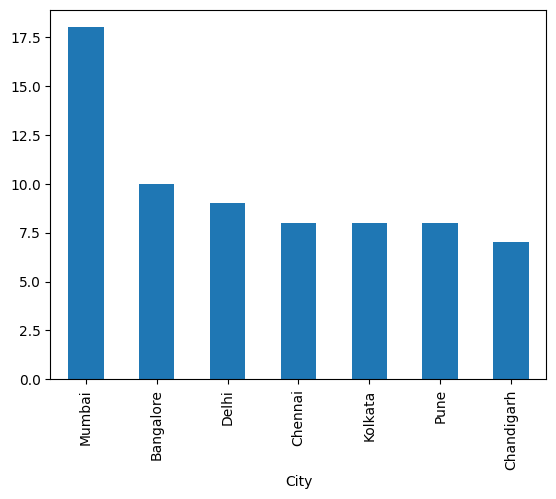

In [120]:
# code here
df.head(1)
df[(df['Team1'] == 'Kokata Knight Riders') | (df['Team2'] == 'Kolkata Knight Riders')].City.value_counts().head(7).plot(kind ='bar')

###`Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [128]:
# code here
df.head(1)
df[(df['Team1'] == 'Mumbai Indians') | (df['Team2'] == 'Mumbai Indians')][(df['Season'] == '2011')][['Margin']].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_12640\3633356934.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['Team1'] == 'Mumbai Indians') | (df['Team2'] == 'Mumbai Indians')][(df['Season'] == '2011')][['Margin']].mean()


Margin    19.25
dtype: float64